In [48]:
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

# Reading Data and transform to DataFrame.
df = pd.read_excel("data\match.xlsx",  engine='openpyxl')

for i in range(len(df)):
    # Strip function delete whitespaces of string.
    df["period"][i]= df["period"][i].strip()
    df["zone"][i]= df["zone"][i].strip()
    df["team"][i]= df["team"][i].strip()
    df["eve"][i]= df["eve"][i].strip()
    df["sub_eve1"][i]= df["sub_eve1"][i].strip()
    df["sub_eve2"][i]= df["sub_eve2"][i].strip()
    df["sub_eve3"][i]= df["sub_eve3"][i].strip()
    df["sub_eve4"][i]= df["sub_eve4"][i].strip()

# Asign extra time to final minutes each times (minute 45').
for i in range(len(df)):

    if df["period"][i]=="1T":
        if df["min"][i]>45:
            df["min"][i]=45
    if df["period"][i]=="2T":
        df["min"][i]=df["min"][i]+45
        if df["min"][i]>90:
            df["min"][i]=90

df = df.assign(time="")

# Change zones of ground in second time for hold positions in field analysis.
for i in range(len(df)):
    if df["period"][i]=="2T":
        if df["zone"][i]=="A1":
            df["zone"][i]="D4"
        elif df["zone"][i]=="A2":
            df["zone"][i]="D3"
        elif df["zone"][i]=="A3":
            df["zone"][i]="D2"
        elif df["zone"][i]=="A4":
            df["zone"][i]="D1"
        elif df["zone"][i]=="B1":
            df["zone"][i]="C4"
        elif df["zone"][i]=="B2":
            df["zone"][i]="C3"
        elif df["zone"][i]=="B3":
            df["zone"][i]="C2"
        elif df["zone"][i]=="B4":
            df["zone"][i]="C1"
        elif df["zone"][i]=="C1":
            df["zone"][i]="B4"
        elif df["zone"][i]=="C2":
            df["zone"][i]="B3"
        elif df["zone"][i]=="C3":
            df["zone"][i]="B2"
        elif df["zone"][i]=="C4":
            df["zone"][i]="B1"
        elif df["zone"][i]=="D1":
            df["zone"][i]="A4"
        elif df["zone"][i]=="D2":
            df["zone"][i]="A3"
        elif df["zone"][i]=="D3":
            df["zone"][i]="A2"
        elif df["zone"][i]=="D4":
            df["zone"][i]="A1"

# Create a new column "time" and represent the interval of time each fiveteen minutes.
for i in range(len(df)):
    if df["min"][i]>=0 and df["min"][i]<15:
        df["time"][i]="0-15"
    elif df["min"][i]>=15 and df["min"][i]<30:
        df["time"][i]="15-30"
    elif df["min"][i]>=30 and df["min"][i]<=45:
        df["time"][i]="30-45"
    elif df["min"][i]>45 and df["min"][i]<60:
        df["time"][i]="45-60"
    elif df["min"][i]>=60 and df["min"][i]<75:
        df["time"][i]="60-75"
    else:
        df["time"][i]="75-90"

# DataFrames to save pass events.
pases_local = df[df["team"] == "Local"]
pases_local = pases_local[pases_local["eve"]=="PAS"]
pases_visita = df[df["team"] == "Visita"]
pases_visita = pases_visita[pases_visita["eve"]=="PAS"]


# DataFrames to save duels events.
duelos = df[df["eve"] == "DUE"]
duelos_ganados_local = pd.DataFrame(columns=['id_relative', 'id_match', 'period', 'min', 'seg', 'zone', 'team', 'eve', 'sub_eve1', 'sub_eve2', 'sub_eve3', 'sub_eve4', 'time' ],index=range(0))
duelos_ganados_visita = pd.DataFrame(columns=['id_relative', 'id_match', 'period', 'min', 'seg', 'zone', 'team', 'eve', 'sub_eve1', 'sub_eve2', 'sub_eve3', 'sub_eve4', 'time' ],index=range(0))

for i in range(len(duelos)):
    if duelos["team"].iloc[i]=="Local" and duelos["sub_eve3"].iloc[i]=="Ganado":
        duelos_ganados_local=duelos_ganados_local.append({'id_relative': duelos['id_relative'].iloc[i], 'id_match': duelos['id_match'].iloc[i], 'period': duelos['period'].iloc[i], 'min': duelos['min'].iloc[i], 'seg': duelos['seg'].iloc[i], 'zone': duelos['zone'].iloc[i], 'team': duelos['team'].iloc[i], 'eve': duelos['eve'].iloc[i], 'sub_eve1': duelos['sub_eve1'].iloc[i], 'sub_eve2': duelos['sub_eve2'].iloc[i], 'sub_eve3': duelos['sub_eve3'].iloc[i], 'sub_eve4': duelos['sub_eve4'].iloc[i], 'time': duelos['time'].iloc[i]}, ignore_index=True)
    elif duelos["team"].iloc[i]=="Visita" and duelos["sub_eve3"].iloc[i]=="Perdido":
        duelos_ganados_local=duelos_ganados_local.append({'id_relative': duelos['id_relative'].iloc[i], 'id_match': duelos['id_match'].iloc[i], 'period': duelos['period'].iloc[i], 'min': duelos['min'].iloc[i], 'seg': duelos['seg'].iloc[i], 'zone': duelos['zone'].iloc[i], 'team': duelos['team'].iloc[i], 'eve': duelos['eve'].iloc[i], 'sub_eve1': duelos['sub_eve1'].iloc[i], 'sub_eve2': duelos['sub_eve2'].iloc[i], 'sub_eve3': duelos['sub_eve3'].iloc[i], 'sub_eve4': duelos['sub_eve4'].iloc[i], 'time': duelos['time'].iloc[i]}, ignore_index=True)
    elif duelos["team"].iloc[i]=="Visita" and duelos["sub_eve3"].iloc[i]=="Ganado":
        duelos_ganados_visita=duelos_ganados_visita.append({'id_relative': duelos['id_relative'].iloc[i], 'id_match': duelos['id_match'].iloc[i], 'period': duelos['period'].iloc[i], 'min': duelos['min'].iloc[i], 'seg': duelos['seg'].iloc[i], 'zone': duelos['zone'].iloc[i], 'team': duelos['team'].iloc[i], 'eve': duelos['eve'].iloc[i], 'sub_eve1': duelos['sub_eve1'].iloc[i], 'sub_eve2': duelos['sub_eve2'].iloc[i], 'sub_eve3': duelos['sub_eve3'].iloc[i], 'sub_eve4': duelos['sub_eve4'].iloc[i], 'time': duelos['time'].iloc[i]}, ignore_index=True)
    elif duelos["team"].iloc[i]=="Local" and duelos["sub_eve3"].iloc[i]=="Perdido":
        duelos_ganados_visita=duelos_ganados_visita.append({'id_relative': duelos['id_relative'].iloc[i], 'id_match': duelos['id_match'].iloc[i], 'period': duelos['period'].iloc[i], 'min': duelos['min'].iloc[i], 'seg': duelos['seg'].iloc[i], 'zone': duelos['zone'].iloc[i], 'team': duelos['team'].iloc[i], 'eve': duelos['eve'].iloc[i], 'sub_eve1': duelos['sub_eve1'].iloc[i], 'sub_eve2': duelos['sub_eve2'].iloc[i], 'sub_eve3': duelos['sub_eve3'].iloc[i], 'sub_eve4': duelos['sub_eve4'].iloc[i], 'time': duelos['time'].iloc[i]}, ignore_index=True)

# DataFrames to save recoveries events.
recuperaciones = df[(df["eve"] == "REC")|(df["eve"] == "PER")]
recuperaciones_local = pd.DataFrame(columns=['id_relative', 'id_match', 'period', 'min', 'seg', 'zone', 'team', 'eve', 'sub_eve1', 'sub_eve2', 'sub_eve3', 'sub_eve4', 'time' ],index=range(0))
recuperaciones_visita = pd.DataFrame(columns=['id_relative', 'id_match', 'period', 'min', 'seg', 'zone', 'team', 'eve', 'sub_eve1', 'sub_eve2', 'sub_eve3', 'sub_eve4', 'time' ],index=range(0))

for i in range(len(recuperaciones)):
    if recuperaciones["team"].iloc[i]=="Local" and recuperaciones["eve"].iloc[i]=="REC":
        recuperaciones_local=recuperaciones_local.append({'id_relative': recuperaciones['id_relative'].iloc[i], 'id_match': recuperaciones['id_match'].iloc[i], 'period': recuperaciones['period'].iloc[i], 'min': recuperaciones['min'].iloc[i], 'seg': recuperaciones['seg'].iloc[i], 'zone': recuperaciones['zone'].iloc[i], 'team': recuperaciones['team'].iloc[i], 'eve': recuperaciones['eve'].iloc[i], 'sub_eve1': recuperaciones['sub_eve1'].iloc[i], 'sub_eve2': recuperaciones['sub_eve2'].iloc[i], 'sub_eve3': recuperaciones['sub_eve3'].iloc[i], 'sub_eve4': recuperaciones['sub_eve4'].iloc[i], 'time': recuperaciones['time'].iloc[i]}, ignore_index=True)
    elif recuperaciones["team"].iloc[i]=="Visita" and recuperaciones["eve"].iloc[i]=="PER":
        recuperaciones_local=recuperaciones_local.append({'id_relative': recuperaciones['id_relative'].iloc[i], 'id_match': recuperaciones['id_match'].iloc[i], 'period': recuperaciones['period'].iloc[i], 'min': recuperaciones['min'].iloc[i], 'seg': recuperaciones['seg'].iloc[i], 'zone': recuperaciones['zone'].iloc[i], 'team': recuperaciones['team'].iloc[i], 'eve': recuperaciones['eve'].iloc[i], 'sub_eve1': recuperaciones['sub_eve1'].iloc[i], 'sub_eve2': recuperaciones['sub_eve2'].iloc[i], 'sub_eve3': recuperaciones['sub_eve3'].iloc[i], 'sub_eve4': recuperaciones['sub_eve4'].iloc[i], 'time': recuperaciones['time'].iloc[i]}, ignore_index=True)
    elif recuperaciones["team"].iloc[i]=="Visita" and recuperaciones["eve"].iloc[i]=="REC":
        recuperaciones_visita=recuperaciones_visita.append({'id_relative': recuperaciones['id_relative'].iloc[i], 'id_match': recuperaciones['id_match'].iloc[i], 'period': recuperaciones['period'].iloc[i], 'min': recuperaciones['min'].iloc[i], 'seg': recuperaciones['seg'].iloc[i], 'zone': recuperaciones['zone'].iloc[i], 'team': recuperaciones['team'].iloc[i], 'eve': recuperaciones['eve'].iloc[i], 'sub_eve1': recuperaciones['sub_eve1'].iloc[i], 'sub_eve2': recuperaciones['sub_eve2'].iloc[i], 'sub_eve3': recuperaciones['sub_eve3'].iloc[i], 'sub_eve4': recuperaciones['sub_eve4'].iloc[i], 'time': recuperaciones['time'].iloc[i]}, ignore_index=True)
    elif recuperaciones["team"].iloc[i]=="Local" and recuperaciones["eve"].iloc[i]=="PER":
        recuperaciones_visita=recuperaciones_visita.append({'id_relative': recuperaciones['id_relative'].iloc[i], 'id_match': recuperaciones['id_match'].iloc[i], 'period': recuperaciones['period'].iloc[i], 'min': recuperaciones['min'].iloc[i], 'seg': recuperaciones['seg'].iloc[i], 'zone': recuperaciones['zone'].iloc[i], 'team': recuperaciones['team'].iloc[i], 'eve': recuperaciones['eve'].iloc[i], 'sub_eve1': recuperaciones['sub_eve1'].iloc[i], 'sub_eve2': recuperaciones['sub_eve2'].iloc[i], 'sub_eve3': recuperaciones['sub_eve3'].iloc[i], 'sub_eve4': recuperaciones['sub_eve4'].iloc[i], 'time': recuperaciones['time'].iloc[i]}, ignore_index=True)




c:\Users\Sebastian\anaconda3\envs\estadisticas\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\Users\Sebastian\anaconda3\envs\estadisticas\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Sebastian\anaconda3\envs\estadisticas\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipyker

In [49]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

# Declaration of form of Dataset (Need identify Home and Away game directions).

analizado = "Visita"
direccion = "D"
nombre_local = "COL"
nombre_visita = "FV"
if analizado == "Local":
    titulo= nombre_local
elif analizado == "Visita":
    titulo= nombre_visita

orden = "Invertido"
myFont = ImageFont.truetype('data/Cocogoose Pro Light-trial.ttf', 50)
der = Image.open("data/flechaderecha.png")
der = der.resize((80,50))
izq = Image.open("data/flechaizquierda.png")
izq = izq.resize((80,50))

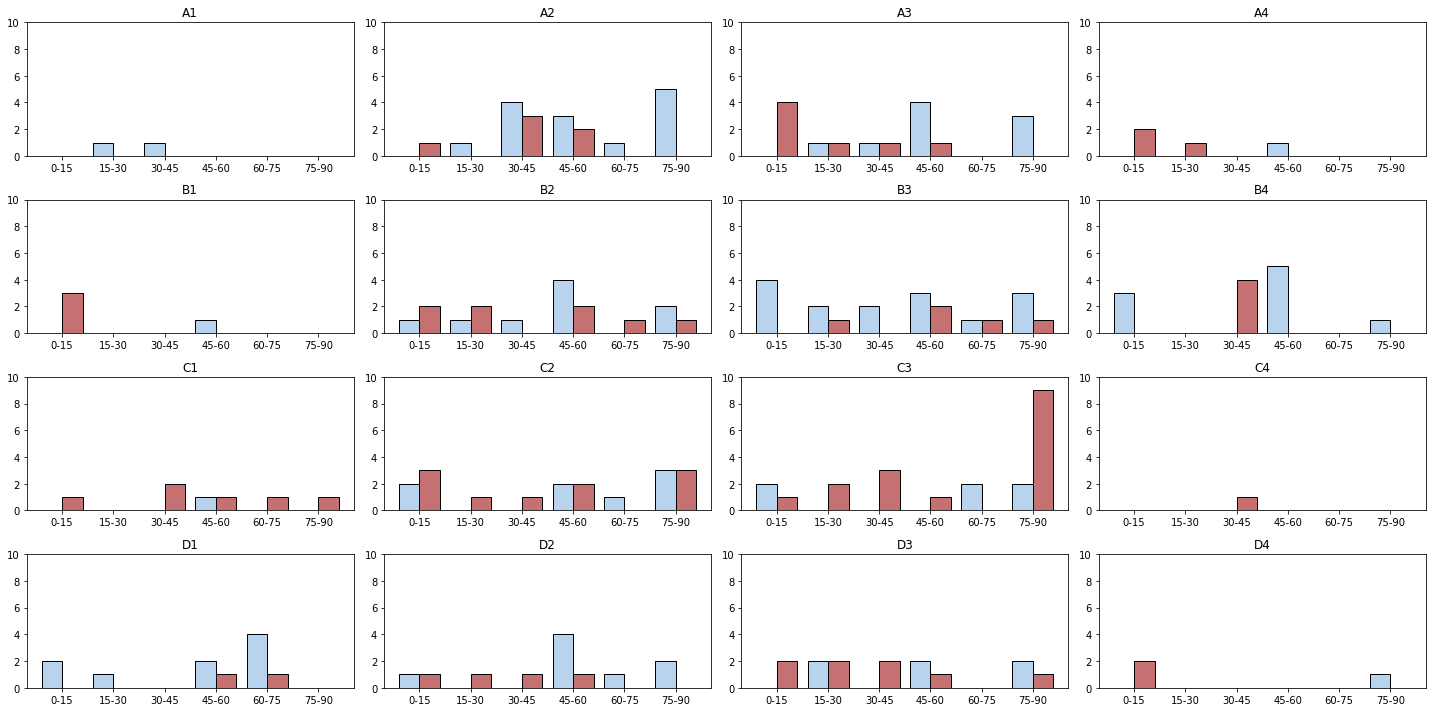

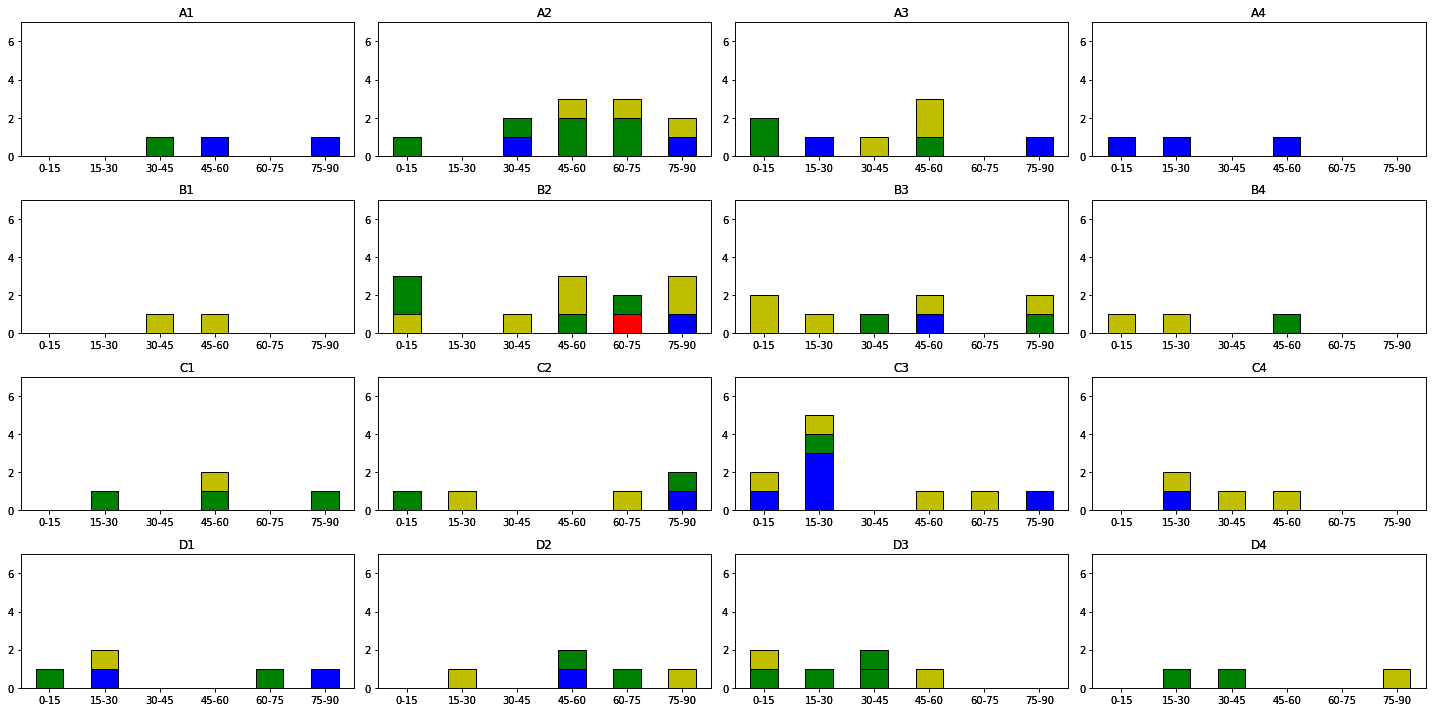

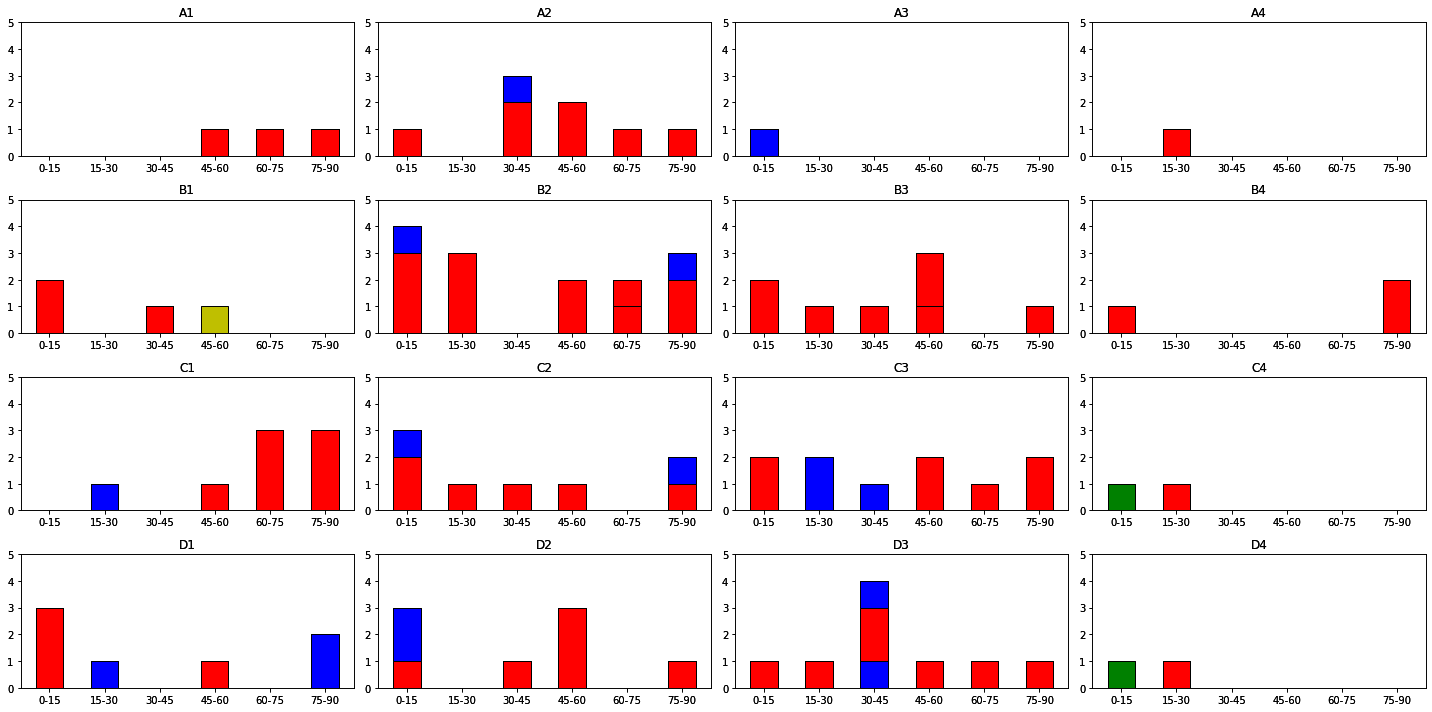

In [50]:
# Function to Plot pass events.
def graficobarraspases(zone, i,  temp_1,  temp_2):

    temp1 = temp_1[temp_1["zone"]==zone]
    temp2 = temp_2[temp_2["zone"]==zone]
    data_loc = {'0-15':  sum(temp1["time"]=="0-15"),
        '15-30': sum(temp1["time"]=="15-30"),
        '30-45': sum(temp1["time"]=="30-45"),
        '45-60': sum(temp1["time"]=="45-60"),
        '60-75': sum(temp1["time"]=="60-75"),
        '75-90': sum(temp1["time"]=="75-90")}

    data_vis = {'0-15':  sum(temp2["time"]=="0-15"),
        '15-30': sum(temp2["time"]=="15-30"),
        '30-45': sum(temp2["time"]=="30-45"),
        '45-60': sum(temp2["time"]=="45-60"),
        '60-75': sum(temp2["time"]=="60-75"),
        '75-90': sum(temp2["time"]=="75-90")}
    
    
    intervalo_loc = list(data_loc.keys())
    pases_loc = list(data_loc.values())
    pases_vis = list(data_vis.values())
    
    ax = fig1.add_subplot(4, 4, i)
    ax.set_facecolor(color=(0,0,0,0))

    plt.bar(intervalo_loc, pases_loc, color=(0.72, 0.827, 0.933), align='edge', width=-0.4, edgecolor='black')
    plt.bar(intervalo_loc, pases_vis, color=(0.776, 0.443, 0.443 ), align='edge', width=0.4, edgecolor='black')
    plt.title(zone)
    plt.ylim(0, 10)

    ax.axhline(0, color='black', linewidth=0.5)
    plt.savefig("results/PasesCompletados.png")
    plt.tight_layout()
    
# Function to Plot duels events.
def graficobarrasduelos(zone, i,  temp_1, path):

    temp1 = temp_1[temp_1["zone"]==zone]
    temp1_e = temp1[temp1["sub_eve1"]=="Entrada"]
    temp1_r = temp1[temp1["sub_eve1"]=="Regate"]
    temp1_d = temp1[temp1["sub_eve1"]=="Dividido"]
    temp1_a = temp1[temp1["sub_eve1"]=="Aereo"]


    data_entrada = {'0-15':  sum(temp1_e["time"]=="0-15"),
        '15-30': sum(temp1_e["time"]=="15-30"),
        '30-45': sum(temp1_e["time"]=="30-45"),
        '45-60': sum(temp1_e["time"]=="45-60"),
        '60-75': sum(temp1_e["time"]=="60-75"),
        '75-90': sum(temp1_e["time"]=="75-90")}
    data_regate = {'0-15':  sum(temp1_r["time"]=="0-15"),
        '15-30': sum(temp1_r["time"]=="15-30"),
        '30-45': sum(temp1_r["time"]=="30-45"),
        '45-60': sum(temp1_r["time"]=="45-60"),
        '60-75': sum(temp1_r["time"]=="60-75"),
        '75-90': sum(temp1_r["time"]=="75-90")}
    data_dividido = {'0-15':  sum(temp1_d["time"]=="0-15"),
        '15-30': sum(temp1_d["time"]=="15-30"),
        '30-45': sum(temp1_d["time"]=="30-45"),
        '45-60': sum(temp1_d["time"]=="45-60"),
        '60-75': sum(temp1_d["time"]=="60-75"),
        '75-90': sum(temp1_d["time"]=="75-90")}
    data_aereo = {'0-15':  sum(temp1_a["time"]=="0-15"),
        '15-30': sum(temp1_a["time"]=="15-30"),
        '30-45': sum(temp1_a["time"]=="30-45"),
        '45-60': sum(temp1_a["time"]=="45-60"),
        '60-75': sum(temp1_a["time"]=="60-75"),
        '75-90': sum(temp1_a["time"]=="75-90")}

    intervalo_loc = list(data_entrada.keys())
    entrada_loc = list(data_entrada.values())
    regate_loc = list(data_regate.values())
    dividido_loc = list(data_dividido.values())
    aereo_loc = list(data_aereo.values())
    
    ax = fig1.add_subplot(4, 4, i)
    ax.set_facecolor(color=(0,0,0,0))

    plt.bar(intervalo_loc, entrada_loc, width = 0.5, color='r', edgecolor='black')
    plt.bar(intervalo_loc, regate_loc,bottom= entrada_loc ,width = 0.5, color='b', edgecolor='black')
    plt.bar(intervalo_loc, dividido_loc, bottom=np.add(entrada_loc, regate_loc), width = 0.5, color='g', edgecolor='black')
    plt.bar(intervalo_loc, aereo_loc, bottom=np.add(np.add(entrada_loc, regate_loc), dividido_loc), width = 0.5, color='y', edgecolor='black')

    plt.title(zone)
    plt.ylim(0, 7)

    ax.axhline(0, color='black', linewidth=0.5)
    plt.savefig("results/"+path+".png")
    plt.tight_layout()

# Function to Plot recoveries events.
def graficobarrasrecuperaciones(zone, i,  temp_1, path):

    temp1 = temp_1[temp_1["zone"]==zone]
    temp1_int = temp1[(temp1["sub_eve1"]=="Intercepcion")|(temp1["sub_eve3"]=="Intercepcion")]
    temp1_rob = temp1[(temp1["sub_eve1"]=="Robo de Balon")|(temp1["sub_eve3"]=="Robo de Balon")]
    temp1_blo = temp1[(temp1["sub_eve1"]=="Bloqueo")|(temp1["sub_eve3"]=="Bloqueo")]
    temp1_sal = temp1[(temp1["sub_eve1"]=="Salvada")|(temp1["sub_eve3"]=="Salvada")]


    data_intercepcion = {'0-15':  sum(temp1_int["time"]=="0-15"),
        '15-30': sum(temp1_int["time"]=="15-30"),
        '30-45': sum(temp1_int["time"]=="30-45"),
        '45-60': sum(temp1_int["time"]=="45-60"),
        '60-75': sum(temp1_int["time"]=="60-75"),
        '75-90': sum(temp1_int["time"]=="75-90")}
    data_robo = {'0-15':  sum(temp1_rob["time"]=="0-15"),
        '15-30': sum(temp1_rob["time"]=="15-30"),
        '30-45': sum(temp1_rob["time"]=="30-45"),
        '45-60': sum(temp1_rob["time"]=="45-60"),
        '60-75': sum(temp1_rob["time"]=="60-75"),
        '75-90': sum(temp1_rob["time"]=="75-90")}
    data_bloqueo = {'0-15':  sum(temp1_blo["time"]=="0-15"),
        '15-30': sum(temp1_blo["time"]=="15-30"),
        '30-45': sum(temp1_blo["time"]=="30-45"),
        '45-60': sum(temp1_blo["time"]=="45-60"),
        '60-75': sum(temp1_blo["time"]=="60-75"),
        '75-90': sum(temp1_blo["time"]=="75-90")}
    data_salvada = {'0-15':  sum(temp1_sal["time"]=="0-15"),
        '15-30': sum(temp1_sal["time"]=="15-30"),
        '30-45': sum(temp1_sal["time"]=="30-45"),
        '45-60': sum(temp1_sal["time"]=="45-60"),
        '60-75': sum(temp1_sal["time"]=="60-75"),
        '75-90': sum(temp1_sal["time"]=="75-90")}

    intervalo_loc = list(data_intercepcion.keys())
    intercepcion_loc = list(data_intercepcion.values())
    robo_loc = list(data_robo.values())
    bloqueo_loc = list(data_bloqueo.values())
    salvada_loc = list(data_salvada.values())

    ax = fig1.add_subplot(4, 4, i)
    ax.set_facecolor(color=(0,0,0,0))

    plt.bar(intervalo_loc, intercepcion_loc, width = 0.5, color='r', edgecolor='black')
    plt.bar(intervalo_loc, robo_loc ,bottom= intercepcion_loc ,width = 0.5, color='b', edgecolor='black')
    plt.bar(intervalo_loc, bloqueo_loc, bottom=np.add(robo_loc, intercepcion_loc), width = 0.5, color='g', edgecolor='black')
    plt.bar(intervalo_loc, salvada_loc, bottom=np.add(np.add(robo_loc, intercepcion_loc), bloqueo_loc), width = 0.5, color='y', edgecolor='black')

    plt.title(zone)
    plt.ylim(0, 5)

    ax.axhline(0, color='black', linewidth=0.5)
    plt.savefig("results/"+path+".png")
    plt.tight_layout()

# Call to plot events functions.
dic_zone = {1:"A1", 2:"A2", 3:"A3", 4:"A4", 5:"B1", 6:"B2", 7:"B3",
            8:"B4", 9:"C1", 10:"C2", 11:"C3", 12:"C4", 13:"D1", 14:"D2", 15:"D3", 16:"D4"}

            
fig1 = plt.figure("Pases Completados", figsize=(20,10))
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

for i, variable in dic_zone.items():
     graficobarraspases(variable, i,  pases_local, pases_visita)

fig1 = plt.figure("Duelos Ganados", figsize=(20,10))
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

for i, variable in dic_zone.items():
     graficobarrasduelos(variable, i,  duelos_ganados_local, "DuelosGanadosLocal")

for i, variable in dic_zone.items():
    graficobarrasduelos(variable, i,  duelos_ganados_visita, "DuelosGanadosVisita")

fig1 = plt.figure("Recuperaciones", figsize=(20,10))
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

for i, variable in dic_zone.items():

     graficobarrasrecuperaciones(variable, i,  recuperaciones_local, "RecuperacionesLocal")

for i, variable in dic_zone.items():

     graficobarrasrecuperaciones(variable, i,  recuperaciones_visita, "RecuperacionesVisita")



In [53]:
# Create Inform "Duelos Ganados Local"
grafico = Image.open("results/DuelosGanadosLocal.png")
fondo2 = Image.open("data/fondo2.png")
fondo2.paste(grafico,(0,141),grafico)
if direccion == "D":
    fondo2.paste(der,(165,35),der)
elif direccion == "I":
    fondo2.paste(izq,(165,35),izq)
I1 = ImageDraw.Draw(fondo2)

if orden == "Normal":
    I1.text((50, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((265, 30), nombre_visita, fill=(198, 113, 113), font=myFont)
elif orden == "Invertido":
    I1.text((265, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((50, 30), nombre_visita, fill=(198, 113, 113), font=myFont)

if analizado == "Local":
    temporal = duelos_ganados_visita 
elif analizado == "Visita":
    temporal = duelos_ganados_local

I1.text((700, 15), "0'-15'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="0-15")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((700, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="0-15")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((730, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="0-15")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((730, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="0-15")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))

I1.text((825, 15), "15'-30'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((825, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="15-30")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((825, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="15-30")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((855, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="15-30")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((855, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="15-30")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((950, 15), "30'-45'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((950, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="30-45")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((950, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="30-45")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((980, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="30-45")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((980, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="30-45")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((1075, 15), "45'-60'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1075, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="45-60")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1075, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="45-60")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1105, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="45-60")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1105, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="45-60")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((1200, 15), "60'-75'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1200, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="60-75")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1200, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="60-75")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1230, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="60-75")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1230, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="60-75")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))

I1.text((1325, 15), "75'-90'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1325, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="75-90")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1325, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="75-90")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1355, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="75-90")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1355, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="75-90")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((425, 15), str("Duelos")+" Perdidos - "+str(titulo), fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 105), "Entrada"+": "+str(temporal[(temporal["sub_eve1"]=="Entrada")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((825, 105), "Regate"+": "+str(temporal[(temporal["sub_eve1"]=="Regate")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((950, 105), "Dividido"+": "+str(temporal[(temporal["sub_eve1"]=="Dividido")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((1075, 105), "Aereo"+": "+str(temporal[(temporal["sub_eve1"]=="Aereo")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
if analizado == "Local":
    I1.text((425, 50), str("Ganados: "+str(duelos_ganados_local.shape[0])+" ("+ str(int(100*duelos_ganados_local.shape[0]/(duelos_ganados_local.shape[0]+duelos_ganados_visita.shape[0])))+"%)"), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    I1.text((425, 80), str("Perdidos: "+str(duelos_ganados_visita.shape[0])+" ("+ str(int(100*duelos_ganados_visita.shape[0]/(duelos_ganados_local.shape[0]+duelos_ganados_visita.shape[0])))+"%)" ), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
elif analizado == "Visita":
    I1.text((425, 50), str("Ganados: "+str(duelos_ganados_visita.shape[0])+" ("+ str(int(100*duelos_ganados_visita.shape[0]/(duelos_ganados_local.shape[0]+duelos_ganados_visita.shape[0])))+"%)" ), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    I1.text((425, 80), str("Perdidos: "+str(duelos_ganados_local.shape[0])+" ("+ str(int(100*duelos_ganados_local.shape[0]/(duelos_ganados_local.shape[0]+duelos_ganados_visita.shape[0])))+"%)"), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    
fondo2.show()
fondo2.save("results/DuelosGanadosLocal-Informe.png")

In [54]:
# Create Inform "Duelos Ganados Visita"
grafico = Image.open("results/DuelosGanadosVisita.png")
fondo2 = Image.open("data/fondo2.png")
fondo2.paste(grafico,(0,141),grafico)
if direccion == "D":
    fondo2.paste(der,(165,35),der)
elif direccion == "I":
    fondo2.paste(izq,(165,35),izq)
I1 = ImageDraw.Draw(fondo2)

if orden == "Normal":
    I1.text((50, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((265, 30), nombre_visita, fill=(198, 113, 113), font=myFont)
elif orden == "Invertido":
    I1.text((265, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((50, 30), nombre_visita, fill=(198, 113, 113), font=myFont)

if analizado == "Local":
    temporal = duelos_ganados_local
elif analizado == "Visita":
    temporal = duelos_ganados_visita

I1.text((700, 15), "0'-15'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="0-15")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((700, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="0-15")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((730, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="0-15")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((730, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="0-15")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))

I1.text((825, 15), "15'-30'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((825, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="15-30")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((825, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="15-30")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((855, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="15-30")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((855, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="15-30")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((950, 15), "30'-45'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((950, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="30-45")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((950, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="30-45")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((980, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="30-45")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((980, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="30-45")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((1075, 15), "45'-60'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1075, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="45-60")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1075, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="45-60")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1105, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="45-60")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1105, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="45-60")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((1200, 15), "60'-75'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1200, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="60-75")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1200, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="60-75")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1230, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="60-75")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1230, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="60-75")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))

I1.text((1325, 15), "75'-90'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1325, 50), str(temporal[(temporal["sub_eve1"]=="Aereo") & (temporal["time"]=="75-90")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1325, 80), str(temporal[(temporal["sub_eve1"]=="Regate") & (temporal["time"]=="75-90")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1355, 50), str(temporal[(temporal["sub_eve1"]=="Dividido") & (temporal["time"]=="75-90")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1355, 80), str(temporal[(temporal["sub_eve1"]=="Entrada") & (temporal["time"]=="75-90")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((425, 15), str("Duelos")+" Ganados - "+str(titulo), fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 105), "Entrada"+": "+str(temporal[(temporal["sub_eve1"]=="Entrada")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((825, 105), "Regate"+": "+str(temporal[(temporal["sub_eve1"]=="Regate")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((950, 105), "Dividido"+": "+str(temporal[(temporal["sub_eve1"]=="Dividido")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((1075, 105), "Aereo"+": "+str(temporal[(temporal["sub_eve1"]=="Aereo")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
if analizado == "Local":
    I1.text((425, 50), str("Ganados: "+str(duelos_ganados_local.shape[0])+" ("+ str(int(100*duelos_ganados_local.shape[0]/(duelos_ganados_local.shape[0]+duelos_ganados_visita.shape[0])))+"%)"), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    I1.text((425, 80), str("Perdidos: "+str(duelos_ganados_visita.shape[0])+" ("+ str(int(100*duelos_ganados_visita.shape[0]/(duelos_ganados_local.shape[0]+duelos_ganados_visita.shape[0])))+"%)" ), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
elif analizado == "Visita":
    I1.text((425, 50), str("Ganados: "+str(duelos_ganados_visita.shape[0])+" ("+ str(int(100*duelos_ganados_visita.shape[0]/(duelos_ganados_local.shape[0]+duelos_ganados_visita.shape[0])))+"%)" ), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    I1.text((425, 80), str("Perdidos: "+str(duelos_ganados_local.shape[0])+" ("+ str(int(100*duelos_ganados_local.shape[0]/(duelos_ganados_local.shape[0]+duelos_ganados_visita.shape[0])))+"%)"), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))

fondo2.show()
fondo2.save("results/DuelosGanadosVisita-Informe.png")

In [55]:
# Create Inform "Recuperaciones Visita"
if analizado == "Local":
    temporal = recuperaciones_local
elif analizado == "Visita":
    temporal = recuperaciones_visita

grafico = Image.open("results/RecuperacionesVisita.png")
fondo2 = Image.open("data/fondo2.png")
fondo2.paste(grafico,(0,141),grafico)
if direccion == "D":
    fondo2.paste(der,(165,35),der)
elif direccion == "I":
    fondo2.paste(izq,(165,35),izq)
I1 = ImageDraw.Draw(fondo2)

if orden == "Normal":
    I1.text((50, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((265, 30), nombre_visita, fill=(198, 113, 113), font=myFont)
elif orden == "Invertido":
    I1.text((265, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((50, 30), nombre_visita, fill=(198, 113, 113), font=myFont)

I1.text((700, 15), "0'-15'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="0-15")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((700, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="0-15")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((730, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="0-15")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((730, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="0-15")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))

I1.text((825, 15), "15'-30'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((825, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="15-30")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((825, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="15-30")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((855, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="15-30")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((855, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="15-30")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((950, 15), "30'-45'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((950, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="30-45")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((950, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="30-45")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((980, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="30-45")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((980, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="30-45")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((1075, 15), "45'-60'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1075, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="45-60")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1075, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="45-60")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1105, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="45-60")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1105, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="45-60")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((1200, 15), "60'-75'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1200, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="60-75")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1200, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="60-75")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1230, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="60-75")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1230, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="60-75")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))

I1.text((1325, 15), "75'-90'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1325, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="75-90")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1325, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="75-90")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1355, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="75-90")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1355, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="75-90")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((425, 15), str("Recuperaciones - ")+str(titulo), fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 105), "Intercepciones"+": "+str(temporal[(temporal["sub_eve1"]=="Intercepcion")].shape[0]+temporal[(temporal["sub_eve3"]=="Intercepcion")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((860, 105), "Robos"+": "+str(temporal[(temporal["sub_eve1"]=="Robo de Balon")].shape[0]+temporal[(temporal["sub_eve3"]=="Robo de Balon")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((950, 105), "Bloqueos"+": "+str(temporal[(temporal["sub_eve1"]=="Bloqueo")].shape[0]+temporal[(temporal["sub_eve3"]=="Bloqueo")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((1070, 105), "Salvadas"+": "+str(temporal[(temporal["sub_eve1"]=="Salvada")].shape[0]+temporal[(temporal["sub_eve3"]=="Salvada")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
if analizado == "Local":
    I1.text((425, 50), str("Ganados: "+str(recuperaciones_local.shape[0])+" ("+ str(int(100*recuperaciones_local.shape[0]/(recuperaciones_local.shape[0]+recuperaciones_visita.shape[0])))+"%)"), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    I1.text((425, 80), str("Perdidos: "+str(recuperaciones_visita.shape[0])+" ("+ str(int(100*recuperaciones_visita.shape[0]/(recuperaciones_local.shape[0]+recuperaciones_visita.shape[0])))+"%)" ), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
elif analizado == "Visita":
    I1.text((425, 50), str("Ganados: "+str(recuperaciones_visita.shape[0])+" ("+ str(int(100*recuperaciones_visita.shape[0]/(recuperaciones_local.shape[0]+recuperaciones_visita.shape[0])))+"%)" ), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    I1.text((425, 80), str("Perdidos: "+str(recuperaciones_local.shape[0])+" ("+ str(int(100*recuperaciones_local.shape[0]/(recuperaciones_local.shape[0]+recuperaciones_visita.shape[0])))+"%)"), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    
fondo2.show()
fondo2.save("results/RecuperacionesVisita-Informe.png")

In [56]:
# Create Inform "Recuperaciones Local"
if analizado == "Local":
    temporal = recuperaciones_visita
elif analizado == "Visita":
    temporal = recuperaciones_local

grafico = Image.open("results/RecuperacionesLocal.png")
fondo2 = Image.open("data/fondo2.png")
fondo2.paste(grafico,(0,141),grafico)
if direccion == "D":
    fondo2.paste(der,(165,35),der)
elif direccion == "I":
    fondo2.paste(izq,(165,35),izq)
I1 = ImageDraw.Draw(fondo2)

if orden == "Normal":
    I1.text((50, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((265, 30), nombre_visita, fill=(198, 113, 113), font=myFont)
elif orden == "Invertido":
    I1.text((265, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((50, 30), nombre_visita, fill=(198, 113, 113), font=myFont)

I1.text((700, 15), "0'-15'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="0-15")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((700, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="0-15")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((730, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="0-15")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((730, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="0-15")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))

I1.text((825, 15), "15'-30'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((825, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="15-30")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((825, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="15-30")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((855, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="15-30")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((855, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="15-30")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((950, 15), "30'-45'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((950, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="30-45")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((950, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="30-45")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((980, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="30-45")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((980, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="30-45")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((1075, 15), "45'-60'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1075, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="45-60")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1075, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="45-60")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1105, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="45-60")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1105, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="45-60")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((1200, 15), "60'-75'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1200, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="60-75")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1200, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="60-75")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1230, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="60-75")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1230, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="60-75")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))

I1.text((1325, 15), "75'-90'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1325, 50), str(temporal[((temporal["sub_eve1"]=="Intercepcion")|(temporal["sub_eve3"]=="Intercepcion")) & (temporal["time"]=="75-90")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1325, 80), str(temporal[((temporal["sub_eve1"]=="Robo de Balon")|(temporal["sub_eve3"]=="Robo de Balon")) & (temporal["time"]=="75-90")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1355, 50), str(temporal[((temporal["sub_eve1"]=="Bloqueo")|(temporal["sub_eve3"]=="Bloqueo")) & (temporal["time"]=="75-90")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1355, 80), str(temporal[((temporal["sub_eve1"]=="Salvada")|(temporal["sub_eve3"]=="Salvada")) & (temporal["time"]=="75-90")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))


I1.text((425, 15), str("Balones Perdidos - ")+str(titulo), fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 105), "Intercepciones"+": "+str(temporal[(temporal["sub_eve1"]=="Intercepcion")].shape[0]+temporal[(temporal["sub_eve3"]=="Intercepcion")].shape[0]), fill=(252, 0, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((860, 105), "Robos"+": "+str(temporal[(temporal["sub_eve1"]=="Robo de Balon")].shape[0]+temporal[(temporal["sub_eve3"]=="Robo de Balon")].shape[0]), fill=(0, 220, 220), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((950, 105), "Bloqueos"+": "+str(temporal[(temporal["sub_eve1"]=="Bloqueo")].shape[0]+temporal[(temporal["sub_eve3"]=="Bloqueo")].shape[0]), fill=(0, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
I1.text((1070, 105), "Salvadas"+": "+str(temporal[(temporal["sub_eve1"]=="Salvada")].shape[0]+temporal[(temporal["sub_eve3"]=="Salvada")].shape[0]), fill=(252, 252, 0), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 15))
if analizado == "Local":
    I1.text((425, 50), str("Ganados: "+str(recuperaciones_local.shape[0])+" ("+ str(int(100*recuperaciones_local.shape[0]/(recuperaciones_local.shape[0]+recuperaciones_visita.shape[0])))+"%)"), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    I1.text((425, 80), str("Perdidos: "+str(recuperaciones_visita.shape[0])+" ("+ str(int(100*recuperaciones_visita.shape[0]/(recuperaciones_local.shape[0]+recuperaciones_visita.shape[0])))+"%)" ), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
elif analizado == "Visita":
    I1.text((425, 50), str("Ganados: "+str(recuperaciones_visita.shape[0])+" ("+ str(int(100*recuperaciones_visita.shape[0]/(recuperaciones_local.shape[0]+recuperaciones_visita.shape[0])))+"%)" ), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    I1.text((425, 80), str("Perdidos: "+str(recuperaciones_local.shape[0])+" ("+ str(int(100*recuperaciones_local.shape[0]/(recuperaciones_local.shape[0]+recuperaciones_visita.shape[0])))+"%)"), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
    
fondo2.show()
fondo2.save("results/RecuperacionesLocal-Informe.png")

In [47]:
# Create Inform "Pases Completados"
grafico = Image.open("results/PasesCompletados.png")
fondo2 = Image.open("data/fondo2.png")
fondo2.paste(grafico,(0,141),grafico)
if direccion == "D":
    fondo2.paste(der,(165,35),der)
elif direccion == "I":
    fondo2.paste(izq,(165,35),izq)
I1 = ImageDraw.Draw(fondo2)

if orden == "Normal":
    I1.text((50, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((265, 30), nombre_visita, fill=(198, 113, 113), font=myFont)
elif orden == "Invertido":
    I1.text((265, 30), nombre_local, fill=(183, 211, 238), font=myFont)
    I1.text((50, 30), nombre_visita, fill=(198, 113, 113), font=myFont)
I1.text((425, 15), "Pases Completados", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 15), "0'-15'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((700, 50), str(pases_local[pases_local["time"]=="0-15"].shape[0])+" ("+str(int(100*pases_local[pases_local["time"]=="0-15"].shape[0]/(pases_local[pases_local["time"]=="0-15"].shape[0]+pases_visita[pases_visita["time"]=="0-15"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((700, 80), str(pases_visita[pases_visita["time"]=="0-15"].shape[0])+" ("+str(int(100*pases_visita[pases_visita["time"]=="0-15"].shape[0]/(pases_local[pases_local["time"]=="0-15"].shape[0]+pases_visita[pases_visita["time"]=="0-15"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((825, 15), "15'-30'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((825, 50), str(pases_local[pases_local["time"]=="15-30"].shape[0])+" ("+str(int(100*pases_local[pases_local["time"]=="15-30"].shape[0]/(pases_local[pases_local["time"]=="15-30"].shape[0]+pases_visita[pases_visita["time"]=="15-30"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((825, 80), str(pases_visita[pases_visita["time"]=="15-30"].shape[0])+" ("+str(int(100*pases_visita[pases_visita["time"]=="15-30"].shape[0]/(pases_local[pases_local["time"]=="15-30"].shape[0]+pases_visita[pases_visita["time"]=="15-30"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((950, 15), "30'-45'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((950, 50), str(pases_local[pases_local["time"]=="30-45"].shape[0])+" ("+str(int(100*pases_local[pases_local["time"]=="30-45"].shape[0]/(pases_local[pases_local["time"]=="30-45"].shape[0]+pases_visita[pases_visita["time"]=="30-45"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((950, 80), str(pases_visita[pases_visita["time"]=="30-45"].shape[0])+" ("+str(int(100*pases_visita[pases_visita["time"]=="30-45"].shape[0]/(pases_local[pases_local["time"]=="30-45"].shape[0]+pases_visita[pases_visita["time"]=="30-45"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1075, 15), "45'-60'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1075, 50), str(pases_local[pases_local["time"]=="45-60"].shape[0])+" ("+str(int(100*pases_local[pases_local["time"]=="45-60"].shape[0]/(pases_local[pases_local["time"]=="45-60"].shape[0]+pases_visita[pases_visita["time"]=="45-60"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1075, 80), str(pases_visita[pases_visita["time"]=="45-60"].shape[0])+" ("+str(int(100*pases_visita[pases_visita["time"]=="45-60"].shape[0]/(pases_local[pases_local["time"]=="45-60"].shape[0]+pases_visita[pases_visita["time"]=="45-60"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1200, 15), "60'-75'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1200, 50), str(pases_local[pases_local["time"]=="60-75"].shape[0])+" ("+str(int(100*pases_local[pases_local["time"]=="60-75"].shape[0]/(pases_local[pases_local["time"]=="60-75"].shape[0]+pases_visita[pases_visita["time"]=="60-75"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1200, 80), str(pases_visita[pases_visita["time"]=="60-75"].shape[0])+" ("+str(int(100*pases_visita[pases_visita["time"]=="60-75"].shape[0]/(pases_local[pases_local["time"]=="60-75"].shape[0]+pases_visita[pases_visita["time"]=="60-75"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1325, 15), "75'-90'", fill=(227, 233, 37), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 25))
I1.text((1325, 50), str(pases_local[pases_local["time"]=="75-90"].shape[0])+" ("+str(int(100*pases_local[pases_local["time"]=="75-90"].shape[0]/(pases_local[pases_local["time"]=="75-90"].shape[0]+pases_visita[pases_visita["time"]=="75-90"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((1325, 80), str(pases_visita[pases_visita["time"]=="75-90"].shape[0])+" ("+str(int(100*pases_visita[pases_visita["time"]=="75-90"].shape[0]/(pases_local[pases_local["time"]=="75-90"].shape[0]+pases_visita[pases_visita["time"]=="75-90"].shape[0])))+"%)", fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((425, 50), str(nombre_local+ ": "+str(pases_local.shape[0])+" ("+ str(int(100*pases_local.shape[0]/(pases_local.shape[0]+pases_visita.shape[0])))+"%)"), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
I1.text((425, 80), str(nombre_visita+ ": "+str(pases_visita.shape[0])+" ("+ str(int(100*pases_visita.shape[0]/(pases_local.shape[0]+pases_visita.shape[0])))+"%)" ), fill=(252, 252, 252), font=ImageFont.truetype('data/Louis George Cafe Bold.ttf', 20))
fondo2.show()
fondo2.save("results/PasesCompletados-Informe.png")